# 필요한 라이브러리 불러오기

In [1]:
import sys, os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit # LSM을 실시하기 위해서 불러오기
import matplotlib.patches as mpatches

plt.ioff()

# 데이터 불러오기 및 필요한 변수 정의

In [2]:
# 디렉토리 변경 및 필요한 데이터 불러오기
os.chdir('C:/Users/hjm01/Desktop/겨울방학/alfven')

csv_list = ['helios1_1975.csv','helios1_1976.csv','helios1_1977.csv']

for i in csv_list:
    Data_helios = pd.read_csv(i,index_col='Time',parse_dates=True)
    try:
        Data = pd.concat([Data,Data_helios])
    except NameError:
        Data = Data_helios
        print("Data 변수 할당")

# 플라즈마 변수들 정의하기
Data['angle'] = Data['angle'].apply(lambda x : (x - 180) if (x > 90) else x)
Data['angle'] = abs(Data['angle'])

Data['ex_t'] = (1.5*10**8)*Data['r_sun']/Data['v']

k = 1.38*10**(-16);e = 4.8*10**(-10); m = 1.67*10**(-24) #g
Data['logarithm'] = np.log((3*np.sqrt(k*Data['T'])**3)/(2*e**3*np.sqrt(Data['n_p']*np.pi)))

up = 4*np.sqrt(np.pi)*e**4*Data['n_p']*Data['logarithm']
down = 3*np.sqrt(m)*np.sqrt(k*Data['T'])**3

Data['chandran_fre'] = up/down

Data['c_n'] = Data['ex_t']*Data['chandran_fre']

k = 8.617*10**(-5) # CGS단위에서 SI단위계로 변경
Data['entro'] = (k*Data['T'])/Data['n_p']**(2/3)

Data['alf_v'] = (Data['B']*10**(-10))/np.sqrt(4*np.pi*Data['n_p']*m)

Data 변수 할당


# 미리 분류 해놓은 특징에 따라 리스트 구성

In [3]:
# 미리 분류 해놓은 시간 리스트 불러오기
list_list = ['minimum/h1_1975.csv','minimum/h1_1976.csv','minimum/h1_1977.csv']

for j in list_list:
    Data_list = pd.read_csv(j,index_col=0)
    Data_list.columns = [['start','start','start','end','end','end','type'],['day','hour','min','day','hour','min','type']]
    Data_list['year'] = j[11:15]
    try:
        time_list = pd.concat([time_list,Data_list.drop(Data_list.index[0])])
    except NameError:
        time_list = Data_list.drop(Data_list.index[0])
        print("list 변수 할당")

# 특징에 따라서 A, B, C로 시간 리스트 구성
list_A = time_list[time_list['type']['type'] == 'a'][['start','end','year']].astype(int)
list_B = time_list[time_list['type']['type'] == 'b'][['start','end','year']].astype(int)
list_C = time_list[time_list['type']['type'] == 'c'][['start','end','year']].astype(int)

list 변수 할당


In [4]:
# 그리고 싶은 변수 지정 및 연도에 따라서 다른 색깔 지정
para = "c_n"

color = {1975 : "red", 1976 : "blue", 1977 : "green"}

# LSM을 위해서 빈 리스트 지정
r_list = [];mean_list = [];std_list = []

In [5]:
idx = 0;i=0

# 시간 리스트에 해당하는 이벤트 데이터 추출하여 데이터 세트 구성
for lst in [list_A]: # list_A, list_B, list_C
    for year in sorted(set(lst['year'])):
        stream = lst[lst['year'] == year][['start','end']]
        for row in range(stream.shape[0]):
            start_time = datetime(year,int(stream.index[row]),stream['start']['day'][row],stream['start']['hour'][row],stream['start']['min'][row],0)
            end_time = datetime(year,int(stream.index[row]),stream['end']['day'][row],stream['end']['hour'][row],stream['end']['min'][row],0)

            mean = Data[start_time:end_time][para].mean() ; std = Data[start_time:end_time][para].std()

            plt.errorbar(Data[start_time:end_time]['r_sun'].mean(),Data[start_time:end_time][para].mean()\
            ,ecolor=color[year],yerr=2*Data[start_time:end_time][para].std(),elinewidth=1,fmt='{}s'.format(color[year][0]),capsize=4,ms=7)            
            
            r_list.append(Data[start_time:end_time]['r_sun'].mean())
            mean_list.append(mean);std_list.append(std)

            try:
                globals()['Data{}'.format(idx+1)] = pd.concat([globals()['Data{}'.format(idx+1)],Data[start_time:end_time]])
            except KeyError:
                globals()['Data{}'.format(idx+1)] = Data[start_time:end_time]

In [6]:
# 데이터의 대략적인 정보 파악
dt = Data1 # Data1, Data2, Data3
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5737 entries, 1975-01-28 19:05:32 to 1977-12-01 04:59:21
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bx            5737 non-null   float64
 1   By            5737 non-null   float64
 2   Bz            5737 non-null   float64
 3   Tp_par        5737 non-null   float64
 4   Tp_perp       5737 non-null   float64
 5   r_sun         5737 non-null   float64
 6   n_p           5737 non-null   float64
 7   vp_x          5737 non-null   float64
 8   vp_y          5737 non-null   float64
 9   vp_z          5737 non-null   float64
 10  vth_p_par     5737 non-null   float64
 11  vth_p_perp    5737 non-null   float64
 12  B             5737 non-null   float64
 13  A             5737 non-null   float64
 14  v             5737 non-null   float64
 15  beta          5737 non-null   float64
 16  T             5737 non-null   float64
 17  lam2          5737 non-null   float

# 각 변수에 따라서 LSM 실시

In [7]:
# scipy에서 사용할 모델 예측
def func(x, a, b):
    return np.log(a) + b * np.log(x)

In [8]:
count = 0
for fit in [Data1]: # Data1, Data2, Data3
    fit = fit.dropna(axis=0)
    xx = fit['r_sun'];yy = fit[para]

    x = np.linspace(0.3,1,10000) # 거리 0.3AU부터 1.0AU까지 지정

    export_list = np.empty((0,len(r_list)),float) # LSM을 위한 빈 리스트 생성
    for mn,sd in zip(mean_list,std_list):
        export_list = np.append(export_list,np.random.normal(mn,sd,10000))

    export_list = export_list.reshape(-1,10000).transpose()

    large = [] ;gamma = []

    for list_idx in range(10000):
        xxx = r_list; yyy = abs(export_list[list_idx]) # mean_list
        popt, pcov = curve_fit(func,xxx,np.log(yyy)) # curve_fit 함수로 LSM실시

        # 얻은 값들은 리스트에 저장
        large.append(popt[0])
        gamma.append(popt[1])

    func_text = r"${:.2f}\/R^{{{:.2f}\pm{:.2f}}}$".format(np.mean(large),np.mean(gamma),2*np.std(gamma))
    plt.plot(x,np.e**func(x,np.mean(large),np.mean(gamma)),'--',linewidth=3,color='black')

    plt.title(func_text,fontsize=15)
    count += 1

c:\users\hjm01\miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 그림 그리기 및 거리에 진행함에 따라 변화 트렌드 파악

red = mpatches.Patch(color=color[1975],label="1975")
blue = mpatches.Patch(color=color[1976],label="1976")
green = mpatches.Patch(color=color[1977],label="1977")

plt.xlim(0.3,1)#;plt.ylim(1.1*10**4,7*10**5)
plt.xscale('log');plt.yscale('log');plt.legend(handles=[red,blue,green])
plt.xticks(np.arange(0.3,1 +0.1,0.1),map(str,np.linspace(3,10,8,endpoint=True)/10),fontsize=15);plt.yticks(fontsize=15)
label_list = {'T':r'$T_{p}[K]$','Tp_perp':r'$T_{\perp}[K]$','Tp_par' : r'$T_{\parallel}[K]$','c_n' : r'$A_{c}$'}
plt.xlabel(r"$R[AU]$",fontsize=15);plt.ylabel(label_list[para],fontsize=15,rotation=0,loc='top',labelpad=-25)

Text(0, 1, '$A_{c}$')

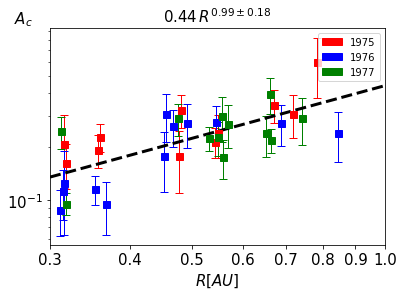

In [10]:
plt.show()